# 35137 - Machine Learning in Finance

## **Homework 1**

Jack Gordon, Kathryn Wason, Christian Bohren

### 0. Setup and data processing

In [ ]:
### INSTALLATIONS ###
!pip install pandas numpy scipy matplotlib scikit-learn

In [ ]:
### IMPORTS ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
### MOUNT DRIVE ###
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Extract data for processing ###
# ====================================================================
#  In Google Drive: (if not the folder owner)
#   Go to "Shared with me"
#   Find the "35137 - ML in Finance" folder
#   Right-click → "Add shortcut to Drive" or "Organize → Add shortcut"
#   Choose "My Drive" as the location
#   Click "Add"
# ====================================================================
data_root = "/content/drive/MyDrive/35137 - ML in Finance/HW1/data"

# Construct full file paths
gw_file_path = os.path.join(data_root, "gw.csv")
fredmd_file_path = os.path.join(data_root, "FREDMD.csv")

# Load data into pandas DataFrames
gw = pd.read_csv(gw_file_path)
fredmd = pd.read_csv(fredmd_file_path)

print(f"gw.csv loaded successfully with {len(gw)} rows")
print(f"FREDMD.csv loaded successfully with {len(fredmd)} rows.")

gw.csv loaded successfully with 1128 rows
FREDMD.csv loaded successfully with 2024 rows.


In [ ]:
### Check gw dataframe ###
gw.head()

,yyyymm,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1,CRSP_SPvw_minus_Rfree
0,192701,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,-0.005410
1,192702,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.042922
2,192703,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,0.004324
3,192704,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.010521
4,192705,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.059353


In [ ]:
### Check fredmd dataframe ###
fredmd.head()

,date,RPI,W875RX1,DPCERA3M086SBEA,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,...,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,OILPRICEx,UMCSENTx,VIXCLSx
0,1855-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1855-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1855-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1855-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1855-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Question 1**
Download the file `gw.csv` from canvas. This file contains monthly S&P 500 index returns along with a series of predictors used to forecast the market. The S&P returns are offset by
one month from the predictors. In the first part of the problem set we will explore how well we can forecast market returns using machine learning methods.

#### **Question 1(a)**

For each of the predictors, regress the S&P 500 index returns on the predictor using the full sample of data. Report the *R<sup>2</sup>s* of these regressions. Next, evaluate the out-of-sampleperformance of each predictor individually using an expanding sample of data starting in
1965. How do the out-of-sample *R<sup>2</sup>s* compare to the in-sample *R<sup>2</sup>s*? Interpret what this means for the usefulness of these predictors in forecasting the market.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define target and predictors
target_col = 'CRSP_SPvw_minus_Rfree'
# Predictors are all columns except 'yyyymm' and the target
predictors = [col for col in gw.columns if col not in ['yyyymm', target_col]]

# --- Part 1: In-Sample R2 (Full Sample) ---
is_r2_results = {}

print("Calculating in-sample R2...")

for predictor in predictors:
    # Ensure data is clean (drop NaNs if any)
    data = gw[[predictor, target_col]].dropna()
    X = data[[predictor]]
    y = data[target_col]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    is_r2_results[predictor] = r2_score(y, y_pred)

print("Completed calculating in-sample R2.")

# --- Part 2: Out-of-Sample R2 (Expanding Window starting 1965) ---
oos_r2_results = {}
start_date = 196501

# Find the index where the expanding window starts
start_index = gw[gw['yyyymm'] == start_date].index[0]

print("Calculating Out-of-Sample R2 (this may take a moment)...")

for predictor in predictors:
    y_true_oos = []
    y_pred_oos = []

    # Iterating through the expanding window
    # We predict for time 'i' using data from 0 to 'i-1'
    for i in range(start_index, len(gw)):
        # Expanding training window
        train = gw.iloc[:i]
        # Test point (current month)
        test = gw.iloc[i:i+1]

        # Skip if missing values in this window
        if train[[predictor, target_col]].isnull().values.any() or test[[predictor, target_col]].isnull().values.any():
             continue

        X_train = train[[predictor]]
        y_train = train[target_col]
        X_test = test[[predictor]]
        y_test = test[target_col]

        model = LinearRegression()
        model.fit(X_train, y_train)

        pred = model.predict(X_test)[0]

        y_true_oos.append(y_test.values[0])
        y_pred_oos.append(pred)

    oos_r2_results[predictor] = r2_score(y_true_oos, y_pred_oos)

print("Completed calculating out-of-sample R2.\n")

# Combine and Display Results
results_df = pd.DataFrame({
    'Predictor': predictors,
    'In-Sample R2': [is_r2_results.get(p, float('nan')) for p in predictors],
    'Out-of-Sample R2': [oos_r2_results.get(p, float('nan')) for p in predictors]
})

print("Overview of factors and in-sample v. out-of-sample R2 values.")

# Sort by In-Sample R2 for better readability
results_df = results_df.sort_values(by='In-Sample R2', ascending=False)

display(results_df)

Calculating in-sample R2...
Completed calculating in-sample R2.
Calculating Out-of-Sample R2 (this may take a moment)...
Completed calculating out-of-sample R2.

Overview of factors and in-sample v. out-of-sample R2 values.


,Predictor,In-Sample R2,Out-of-Sample R2
12,b/m_lag1,0.006005,-0.034282
13,ntis_lag1,0.004855,-0.014691
9,dy_lag1,0.004023,-0.011630
6,tbl_lag1,0.003436,-0.001042
11,ep_lag1,0.003258,-0.018206
8,dp_lag1,0.002990,-0.007564
0,dfy_lag1,0.002671,-0.000669
1,infl_lag1,0.002639,0.000713
10,ltr_lag1,0.002437,-0.002524
4,lty_lag1,0.002113,-0.007292


**Response**:

The regression output in-sample and out-of-sample *R<sup>2</sup>* values can be found above, organized in descending order based on the in-sample *R<sup>2</sup>* values.

When looking at only the in-sample *R<sup>2</sup>* values, there appear to be some predictors (e.g., `b/m_lag1` or Book-to-Market ratio) that have a little bit more predictive value, though even those tend to be low. However, as soon as we begin to consider the out-of-sample *R<sup>2</sup>* values, we see them largely turning negative - this reflects that they actually do worse than just predicting using the mean expected return. The only one that appears to have any individual predictive value over the mean is `infl_lag1` (Inflation), and that is very low.

In general, these predictors do not generalize and likely only capture noise. This means that there is generally harm in using these as individual predictors in forecasting the market.

#### **Question 1(b)**

Next, try the same expanding sample exercise but include all the predictors in a single regression, compare the out-of-sample *R<sup>2</sup>* here to those in part (a). Let’s now incorporate a penalty term into the regression to counteract overfitting. Compute results for lasso, ridge, and elastic net and use K-fold cross-validation to select the optimal penalty term. Plot the out-of-sample *R<sup>2</sup>* for each month for each of the three methods along with the un-penalized regression. How do the methods compare? What does this tell us about the predictability of market returns?

Starting expanding window estimation (this will take a minute)...
Processed through 196809
Processed through 197701
Processed through 198505
Processed through 199309
Processed through 200201
Processed through 201005
Processed through 201809
Estimation complete.

Final Out-of-Sample R2 Comparison:


,OOS R2
ENet,-0.009763
Lasso,-0.009827
Ridge,-0.061961
OLS,-0.081977


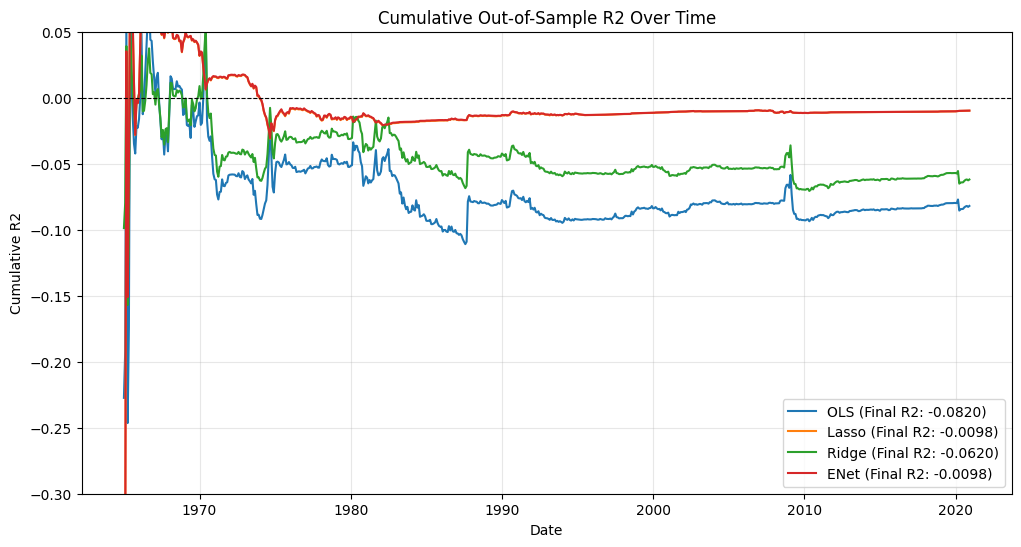

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Setup
target = 'CRSP_SPvw_minus_Rfree'
predictors = [c for c in gw.columns if c not in ['yyyymm', target]]
start_date = 196501
start_index = gw[gw['yyyymm'] == start_date].index[0]

# Storage for predictions
preds = {'OLS': [], 'Lasso': [], 'Ridge': [], 'ENet': [], 'Mean': []}
actuals = []
dates = []

print("Starting expanding window estimation (this will take a minute)...")

for i in range(start_index, len(gw)):
    # Expanding window
    train = gw.iloc[:i]
    test = gw.iloc[i:i+1]

    # Check for NaNs
    if train[predictors + [target]].isnull().values.any() or test[predictors + [target]].isnull().values.any():
        continue

    X_train = train[predictors]
    y_train = train[target]
    X_test = test[predictors]
    y_test = test[target]

    # Store actual and date
    actuals.append(y_test.values[0])
    dates.append(str(test['yyyymm'].values[0]))

    # Benchmark: Historical Mean
    pred_mean = y_train.mean()
    preds['Mean'].append(pred_mean)

    # 1. OLS (Unpenalized Multivariate)
    ols = LinearRegression()
    ols.fit(X_train, y_train)
    preds['OLS'].append(ols.predict(X_test)[0])

    # Scaling for penalized models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Lasso
    # using cv=5 for 5-fold cross-validation
    lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    preds['Lasso'].append(lasso.predict(X_test_scaled)[0])

    # 3. Ridge
    ridge = RidgeCV(cv=5)
    ridge.fit(X_train_scaled, y_train)
    preds['Ridge'].append(ridge.predict(X_test_scaled)[0])

    # 4. Elastic Net
    enet = ElasticNetCV(cv=5, random_state=42, max_iter=10000)
    enet.fit(X_train_scaled, y_train)
    preds['ENet'].append(enet.predict(X_test_scaled)[0])

    if i % 100 == 0:
        print(f"Processed through {test['yyyymm'].values[0]}")

print("Estimation complete.")

# --- Calculation of Cumulative R2 ---
# R2_t = 1 - (CumSSE_model_t / CumSSE_mean_t)

actuals_arr = np.array(actuals)
preds_mean_arr = np.array(preds['Mean'])
cum_sse_mean = np.cumsum((actuals_arr - preds_mean_arr)**2)

r2_series = {}
final_r2 = {}

for model_name in ['OLS', 'Lasso', 'Ridge', 'ENet']:
    preds_model = np.array(preds[model_name])
    cum_sse_model = np.cumsum((actuals_arr - preds_model)**2)

    # Avoid division by zero at the very start
    with np.errstate(divide='ignore', invalid='ignore'):
        r2_curve = 1 - (cum_sse_model / cum_sse_mean)

    r2_series[model_name] = r2_curve
    # Overall Out-of-Sample R2
    final_r2[model_name] = 1 - (np.sum((actuals_arr - preds_model)**2) / np.sum((actuals_arr - preds_mean_arr)**2))

print("\nFinal Out-of-Sample R2 Comparison:")
display(pd.Series(final_r2, name='OOS R2').sort_values(ascending=False))

# --- Plotting ---
plt.figure(figsize=(12, 6))
plot_dates = pd.to_datetime(dates, format='%Y%m')

for model_name, curve in r2_series.items():
    plt.plot(plot_dates, curve, label=f"{model_name} (Final R2: {final_r2[model_name]:.4f})")

plt.title("Cumulative Out-of-Sample R2 Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative R2")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()

# Restrict y-axis to see the movement around 0 better, as OLS often drops significantly
plt.ylim(-0.3, 0.05)
plt.grid(True, alpha=0.3)
plt.show()

**Response**:

The plotted out-of-sample *R<sup>2</sup>* can be found above for OLS, Lasso, Ridge, and Elastic Net options (*n.b.*, Lasso and Elastic Net overlap each other for most of the simulation, hence only the Elastic Net line is clearly visible).

When looking at the four methods, we see the following:
- **OLS** provides the worst way of predicting market returns - this is an unsurprising output as each individual linear predictor introduces further noise into the model.
- **Ridge** begins to provide a little bit of improved performance, as the algorithm forces some predictors to shrink, though all of them are still retained.
- **Lasso** and **Elastic Net** perform the best of these linear models, as they penalize some predictors such that their coefficients go to zero, removing them from the final model. However, even these methods do not exhibit a positive *R<sup>2</sup>* value, showing that they are persistently worse than just using the mean expected return.

Across methods, we can continue to see that, in a world with high-noise, low-signal predictors, it is extremely difficult to forecast monthly market returns. Linear regressions generally cannot effectively predict market returns better than simple estimates, even with large predictor sets and regularization.

#### **Question 1(c)**

Next, lets introduce some non-linearities into the model. Use the radial basis function kernel to generate non-linear expansions of the underlying predictor set (use the `RBFSampler`
from `sklearn`). Generate these features for a number of different feature counts. Plot the out-of-sample *R<sup>2</sup>* as a function of the number of features generated by the kernel. How do the results compare to the linear models? Interpret the importance of the number of features in the kernel expansion.

Comparing Out-of-Sample R2 across feature counts (RBFSampler + RidgeCV)...
Completed n_features=5: R2 = -0.04204
Completed n_features=10: R2 = -0.02124
Completed n_features=25: R2 = -0.03421
Completed n_features=50: R2 = -0.03918
Completed n_features=100: R2 = -0.04350
Completed n_features=250: R2 = -0.02461
Completed n_features=500: R2 = -0.02416
Completed n_features=1000: R2 = 0.00379
Completed n_features=2000: R2 = -0.00289
Completed n_features=5000: R2 = 0.00048


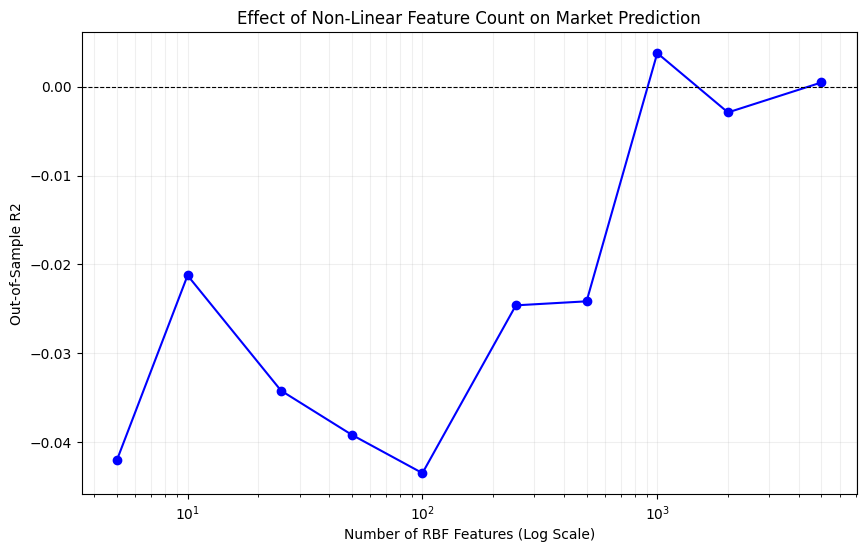

In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Configuration
feature_counts = [5, 10, 25, 50, 100, 250, 500, 1000, 2000, 5000]
target = 'CRSP_SPvw_minus_Rfree'
predictors = [c for c in gw.columns if c not in ['yyyymm', target]]
start_date = 196501
start_index = gw[gw['yyyymm'] == start_date].index[0]

oos_r2_results_kernel = {}

print("Comparing Out-of-Sample R2 across feature counts (RBFSampler + RidgeCV)...")

for n_feat in feature_counts:
    preds = []
    actuals = []
    baseline_errors = []

    # Initialize RBF Sampler
    # Fit once to fix the random weights for consistent feature definitions across time
    # gamma=1.0 is default, standard scaling applied before transform
    rbf_sampler = RBFSampler(gamma=1.0, n_components=n_feat, random_state=42)

    # FIX: Fit on .values (numpy array) to avoid "feature names" warnings during transform
    rbf_sampler.fit(gw[predictors].iloc[:5].values)

    for i in range(start_index, len(gw)):
        train = gw.iloc[:i]
        test = gw.iloc[i:i+1]

        # Skip NaNs
        if train[predictors + [target]].isnull().values.any() or test[predictors + [target]].isnull().values.any():
            continue

        X_train = train[predictors]
        y_train = train[target]
        X_test = test[predictors]
        y_test = test[target]

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # RBF Transform
        X_train_rbf = rbf_sampler.transform(X_train_scaled)
        X_test_rbf = rbf_sampler.transform(X_test_scaled)

        # Ridge Regression (efficient LOO-CV default)
        model = RidgeCV()
        model.fit(X_train_rbf, y_train)

        pred = model.predict(X_test_rbf)[0]
        actual = y_test.values[0]

        preds.append(pred)
        actuals.append(actual)

        # Expanding mean baseline error for R2 calculation
        baseline_pred = y_train.mean()
        baseline_errors.append(actual - baseline_pred)

    # Calculate OOS R2
    mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
    mse_baseline = np.mean(np.array(baseline_errors)**2)
    r2 = 1 - mse_model / mse_baseline

    oos_r2_results_kernel[n_feat] = r2
    print(f"Completed n_features={n_feat}: R2 = {r2:.5f}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
features = list(oos_r2_results_kernel.keys())
r2_values = list(oos_r2_results_kernel.values())

plt.plot(features, r2_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Number of RBF Features (Log Scale)')
plt.ylabel('Out-of-Sample R2')
plt.title('Effect of Non-Linear Feature Count on Market Prediction')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

**Response**:

To answer this, we generated models with generated feature counts ranging between `[5-5000]` to compare to the linear models and compare within the non-linear expansions.

Compared to the linear models, we see that the non-linear expansions with lower numbers of features (i.e., `[5, 10, 25, 50, 100, 250, 500]`) performed relatively better than **OLS** and **Ridge**, though with negative *R<sup>2</sup>* values. These however were still worse-performing than our **Lasso** and **Elastic Net** regressions.

However, once the number of features increases more significantly (i.e., `[1000, 2000, 5000]`), the non-linear expansions begin to perform better than all linear models, including **Lasso** and **Elastic Net**. In this example, those runs for `[1000, 5000]` even show positive *R<sup>2</sup>* values.

In reflecting on these outputs, it appears that increasing the total number of features in non-linear expansions improves upon the performance of the regressions. This is likely due to the fact that these incremental features are better able to interpret the high noise within the data, though with relatively less interpretability versus linear models.

#### **Question 1(d)**

To what extent do our results depend on the training window Refit the model from part (c) using a rolling window of 12, 36, 60, and 120 months. What do you observe about the out-of-sample *R<sup>2</sup>* as the training window changes?

Evaluating Rolling Windows with 100 RBF Features...
Window Size: 12 months | OOS R2: -0.10791
Window Size: 36 months | OOS R2: -0.05388
Window Size: 60 months | OOS R2: -0.04798
Window Size: 120 months | OOS R2: -0.02932


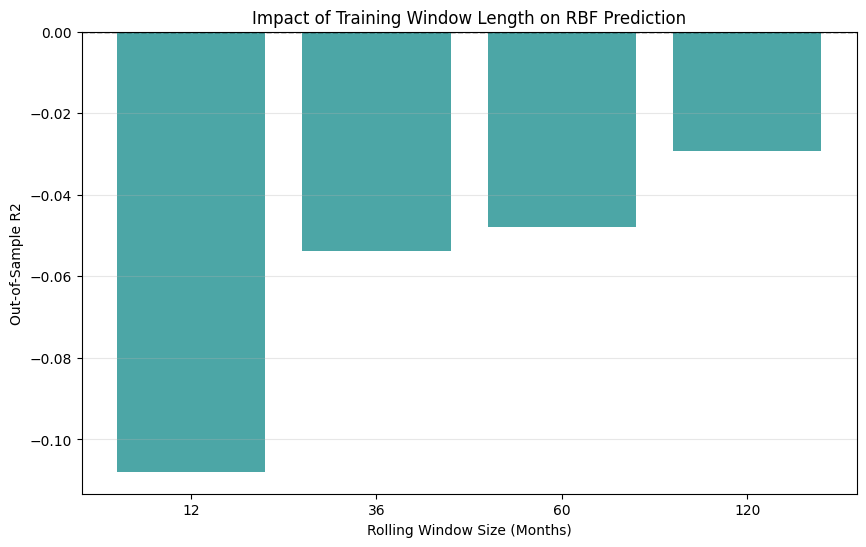

In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Configuration
window_sizes = [12, 36, 60, 120]
target = 'CRSP_SPvw_minus_Rfree'
predictors = [c for c in gw.columns if c not in ['yyyymm', target]]
start_date = 196501
start_index = gw[gw['yyyymm'] == start_date].index[0]

# Fix feature count from part (c) - using 100 features as a stable representative
n_feat = 100
rbf_sampler = RBFSampler(gamma=1.0, n_components=n_feat, random_state=42)
# Fit once to fix random weights (input dimension is all that matters here)
rbf_sampler.fit(gw[predictors].iloc[:5].values)

oos_r2_windows = {}

print(f"Evaluating Rolling Windows with {n_feat} RBF Features...")

for w in window_sizes:
    preds = []
    actuals = []
    baseline_errors = []

    for i in range(start_index, len(gw)):
        # Rolling window: from index i-w to i-1
        # Since start_index is 456, and max window is 120, we always have enough data
        train = gw.iloc[i-w:i]
        test = gw.iloc[i:i+1]

        # Standard safety check for NaNs
        if train[predictors + [target]].isnull().values.any() or test[predictors + [target]].isnull().values.any():
            continue

        X_train = train[predictors]
        y_train = train[target]
        X_test = test[predictors]
        y_test = test[target]

        # Scaling: Fit only on training window to prevent look-ahead bias
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply RBF Kernel expansion
        X_train_rbf = rbf_sampler.transform(X_train_scaled)
        X_test_rbf = rbf_sampler.transform(X_test_scaled)

        # Ridge Regression with Leave-One-Out Cross-Validation for alpha selection
        model = RidgeCV()
        model.fit(X_train_rbf, y_train)

        pred = model.predict(X_test_rbf)[0]
        actual = y_test.values[0]

        preds.append(pred)
        actuals.append(actual)

        # Benchmark: Expanding historical mean up to month i-1
        baseline_pred = gw.iloc[:i][target].mean()
        baseline_errors.append(actual - baseline_pred)

    # Calculate Out-of-Sample R2
    mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
    mse_baseline = np.mean(np.array(baseline_errors)**2)
    r2 = 1 - mse_model / mse_baseline

    oos_r2_windows[w] = r2
    print(f"Window Size: {w} months | OOS R2: {r2:.5f}")

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
plt.bar([str(w) for w in window_sizes], list(oos_r2_windows.values()), color='teal', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Rolling Window Size (Months)')
plt.ylabel('Out-of-Sample R2')
plt.title('Impact of Training Window Length on RBF Prediction')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Response**:

There is a direct relationship between a larger timing window and a smaller *R<sup>2</sup>* value. This is the result of greater data availability and stronger error correction. With a larger timing window, small anomolous errors are smoothed out across the larger dataset, leading to a smaller *R<sup>2</sup>* value.

#### **Question 1(e)**

To what extent do our results depend on the cross-validation method? Refit the model from part (c) using a range of folds for cross-validation. What do you observe about the out-of-sample *R<sup>2</sup>* as the number of folds changes?

Evaluating RBF-expanded RidgeCV with 100 features across different CV folds (TimeSeriesSplit)...
Completed CV Folds=2: R2 = -0.00048
Completed CV Folds=3: R2 = 0.00106
Completed CV Folds=5: R2 = -0.00034
Completed CV Folds=10: R2 = -0.00011
Completed CV Folds=20: R2 = 0.00047


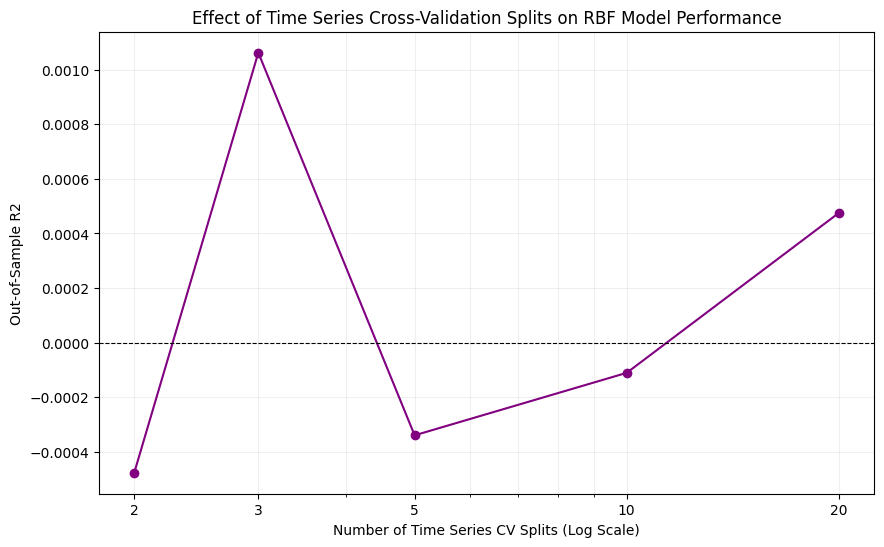

In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cv_folds = [2, 3, 5, 10, 20]

# Configuration from part (c) and previous subtask
target = 'CRSP_SPvw_minus_Rfree'
predictors = [c for c in gw.columns if c not in ['yyyymm', target]]
start_date = 196501
start_index = gw[gw['yyyymm'] == start_date].index[0]

n_feat = 100 # Using 100 features as in the fixed part (c) for this comparison
rbf_sampler = RBFSampler(gamma=1.0, n_components=n_feat, random_state=42)
rbf_sampler.fit(gw[predictors].iloc[:5].values)

oos_r2_cv_folds = {}

print(f"Evaluating RBF-expanded RidgeCV with {n_feat} features across different CV folds (TimeSeriesSplit)...")

# Define a broader range of alpha values to search
# This is done here to avoid re-defining for each iteration of cv_num
ridge_alphas = np.logspace(-3, 3, 10) # Example: 10 values from 0.001 to 1000

for cv_num in cv_folds:
    preds = []
    actuals = []
    baseline_errors = []

    # Iterate through the expanding window
    for i in range(start_index, len(gw)):
        train = gw.iloc[:i]
        test = gw.iloc[i:i+1]

        # Skip NaNs
        if train[predictors + [target]].isnull().values.any() or test[predictors + [target]].isnull().values.any():
            continue

        X_train = train[predictors]
        y_train = train[target]
        X_test = test[predictors]
        y_test = test[target]

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # RBF Transform
        X_train_rbf = rbf_sampler.transform(X_train_scaled)
        X_test_rbf = rbf_sampler.transform(X_test_scaled)

        # Ridge Regression with TimeSeriesSplit
        # Using TimeSeriesSplit ensures no look-ahead bias in the CV splits
        tscv = TimeSeriesSplit(n_splits=cv_num)
        model = RidgeCV(alphas=ridge_alphas, cv=tscv)
        model.fit(X_train_rbf, y_train)

        pred = model.predict(X_test_rbf)[0]
        actual = y_test.values[0]

        preds.append(pred)
        actuals.append(actual)

        # Expanding mean baseline error for R2 calculation
        baseline_pred = gw.iloc[:i][target].mean()
        baseline_errors.append(actual - baseline_pred)

    # Calculate OOS R2
    mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
    mse_baseline = np.mean(np.array(baseline_errors)**2)
    r2 = 1 - mse_model / mse_baseline

    oos_r2_cv_folds[cv_num] = r2
    print(f"Completed CV Folds={cv_num}: R2 = {r2:.5f}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(list(oos_r2_cv_folds.keys()), list(oos_r2_cv_folds.values()), marker='o', linestyle='-', color='purple')
plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Number of Time Series CV Splits (Log Scale)')
plt.ylabel('Out-of-Sample R2')
plt.title('Effect of Time Series Cross-Validation Splits on RBF Model Performance')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xticks(cv_folds, labels=[str(f) for f in cv_folds]) # Ensure all cv_folds are labeled
plt.show()

**Response**:

As we vary the number of folds for cross validation within `[2, 3, 5, 10, 20]` we do see a slight difference in the performance on the out-of-sample *R<sup>2</sup>* values. While the value we saw for `K = 3` may be an outlier or anomaly for this run, we see that there tends to be an improvement as the number of folds `K` increases, with a log-linear pattern emerging towards `K = 20`. This exhibits how using incremental folds for cross-validation can improve performance by providing a larger set of simulations over which we can construct a final output.

#### **Question 1(f)**

Next, download the `FREDMD.csv` file from canvas. Incorporate the macroeconomic variables from this file into the model from part (c). How do the out-of-sample R2 change when we include these variables? What does this tell us about the virtue of complexity?

In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Processing and Merging ---

# Prepare FRED-MD
fredmd_clean = fredmd.copy()
fredmd_clean['date'] = pd.to_datetime(fredmd_clean['date'])
# Create yyyymm for merging
fredmd_clean['yyyymm'] = fredmd_clean['date'].dt.year * 100 + fredmd_clean['date'].dt.month

# Identify FRED-MD predictor columns (all except date/yyyymm)
fredmd_predictors = [c for c in fredmd_clean.columns if c not in ['date', 'yyyymm']]

# Shift FRED-MD predictors by 1 month.
# gw dataset has aligned rows: Returns(t) and Predictors(t-1).
# We need to align FRED-MD(t-1) with Returns(t).
fredmd_clean[fredmd_predictors] = fredmd_clean[fredmd_predictors].shift(1)

# Merge with gw
# We use inner join to keep only matching dates
combined_df = pd.merge(gw, fredmd_clean[['yyyymm'] + fredmd_predictors], on='yyyymm', how='inner')

# Filter for a valid time range where FRED-MD is mostly balanced (e.g., post-1960)
valid_start = 196001
data = combined_df[combined_df['yyyymm'] >= valid_start].copy()

# Robust Missing Value Handling:
# Instead of dropping rows (which kills the data if one col is bad), drop columns with NaNs.
data = data.dropna(axis=1)

# Define target
target = 'CRSP_SPvw_minus_Rfree'

# Update predictors list to include only columns present in the cleaned data
# (excluding yyyymm and target)
valid_columns = set(data.columns)
all_predictors = [c for c in valid_columns if c not in ['yyyymm', target]]

print(f"Combined dataset shape: {data.shape}")
print(f"Number of predictors retained: {len(all_predictors)}")

if data.empty:
    print("Error: Dataset is empty after merging. Check data availability.")
else:
    # --- 2. Expanding Window Estimation ---
    start_date = 196501
    try:
        start_index = data[data['yyyymm'] == start_date].index[0]
    except IndexError:
        # Fallback if exact 196501 is missing, find closest
        start_index = data[data['yyyymm'] >= start_date].index[0]
        print(f"Start date adjusted to index {start_index} ({data.iloc[start_index]['yyyymm']})")

    # Initialize RBF Sampler
    n_feat = 100
    rbf_sampler = RBFSampler(gamma=1.0, n_components=n_feat, random_state=42)
    # Fit on initial data to fix random weights
    rbf_sampler.fit(data[all_predictors].iloc[:5].values)

    preds = []
    actuals = []
    baseline_errors = []

    print("Starting expanding window with FRED-MD variables...")

    for i in range(start_index, len(data)):
        train = data.iloc[:i]
        test = data.iloc[i:i+1]

        X_train = train[all_predictors]
        y_train = train[target]
        X_test = test[all_predictors]
        y_test = test[target]

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # RBF Transform
        X_train_rbf = rbf_sampler.transform(X_train_scaled)
        X_test_rbf = rbf_sampler.transform(X_test_scaled)

        # Ridge Regression (Default efficient LOO-CV)
        model = RidgeCV()
        model.fit(X_train_rbf, y_train)

        pred = model.predict(X_test_rbf)[0]
        actual = y_test.values[0]

        preds.append(pred)
        actuals.append(actual)

        # Baseline (Historical Mean)
        baseline_pred = y_train.mean()
        baseline_errors.append(actual - baseline_pred)

        if i % 100 == 0:
            print(f"Processed {data.iloc[i]['yyyymm']}")

    # --- 3. Results ---
    mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
    mse_baseline = np.mean(np.array(baseline_errors)**2)
    oos_r2 = 1 - mse_model / mse_baseline

    print(f"\nOut-of-Sample R2 with FRED-MD variables: {oos_r2:.5f}")

Combined dataset shape: (732, 122)
Number of predictors retained: 120
Starting expanding window with FRED-MD variables...
Processed 200109.0
Processed 201001.0
Processed 201805.0

Out-of-Sample R2 with FRED-MD variables: -0.02713


**Response**:

When we include the macroeconomic variables from the `fredmd` dataset, we see a somewhat improved model. Specifically with 100 factors, we find that his new version has an out-of-sample *R<sup>2</sup>* of `-.02713`, whereas the prior exhibited a value of `-0.04350`. While this is an improvement over the prior model, we still struggle to predict returns very accurately.

However, this does demonstrate to us that, in this domain, there is value to including a higher number of potential parameters to capture nonlinearities, given the improvement at the same number of factors.

#### **Question 1(g)**

Lets compare the results from part (c) to some alternative methods. Compare the results to the `KernelRidge`, principal components regression (combine `PCA` with a standard regression framework), `PLSRegression`, and `GradientBoostingRegressor` methods from
`sklearn`.

Starting expanding window estimation for alternative models...
Processed through 196809
Processed through 197701
Processed through 198505
Processed through 199309
Processed through 200201
Processed through 201005
Processed through 201809

Out-of-Sample R2 Results:
KernelRidge: -0.02528
PCR (PCA+OLS): -0.04692
PLSRegression: -0.07506
GradientBoosting: -0.37568
Part (c) Baseline: -0.04350


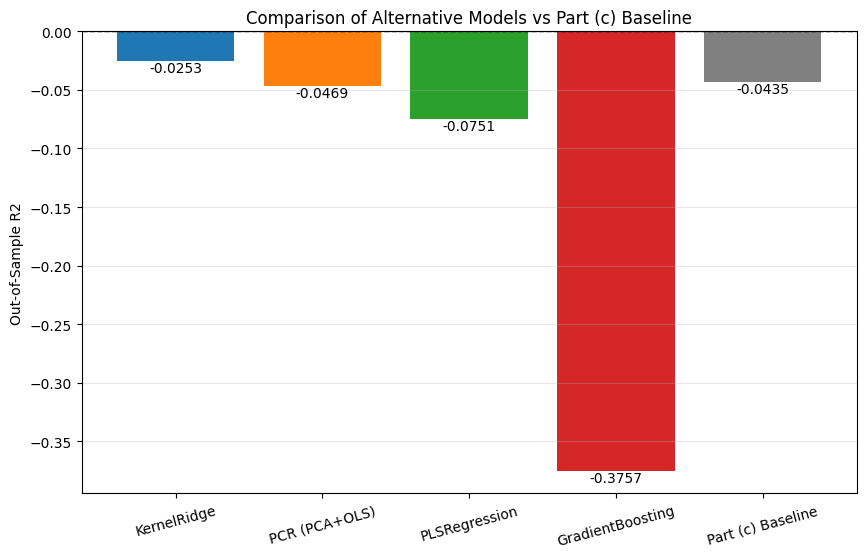

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setup Data
target = 'CRSP_SPvw_minus_Rfree'
predictors = [c for c in gw.columns if c not in ['yyyymm', target]]
start_date = 196501
start_index = gw[gw['yyyymm'] == start_date].index[0]

# Define Models
# We use pipelines where appropriate to ensure correct scaling and transformation within each window
models = {
    'KernelRidge': make_pipeline(StandardScaler(), KernelRidge(kernel='rbf', alpha=1.0)),
    'PCR (PCA+OLS)': make_pipeline(StandardScaler(), PCA(n_components=10), LinearRegression()),
    'PLSRegression': make_pipeline(StandardScaler(), PLSRegression(n_components=5)),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
    # Part (c) Baseline: RBF (100 features) + RidgeCV
    # RBFSampler with fixed random_state ensures consistent features across expanding windows
    'Part (c) Baseline': make_pipeline(StandardScaler(), RBFSampler(gamma=1.0, n_components=100, random_state=42), RidgeCV())
}

model_preds = {name: [] for name in models.keys()}
actuals = []
baseline_errors = []

print("Starting expanding window estimation for alternative models...")

for i in range(start_index, len(gw)):
    train = gw.iloc[:i]
    test = gw.iloc[i:i+1]

    # Skip window if NaNs present
    if train[predictors + [target]].isnull().values.any() or test[predictors + [target]].isnull().values.any():
        continue

    X_train = train[predictors]
    y_train = train[target]
    X_test = test[predictors]
    y_test = test[target]

    actual = y_test.values[0]
    actuals.append(actual)

    # Historical Mean Baseline
    pred_mean = y_train.mean()
    baseline_errors.append(actual - pred_mean)

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        # Handle different output shapes (e.g. arrays vs scalars)
        if isinstance(pred, np.ndarray):
            pred = pred.item()

        model_preds[name].append(pred)

    if i % 100 == 0:
        print(f"Processed through {test['yyyymm'].values[0]}")

# Calculate OOS R2
results_r2 = {}
mse_baseline = np.mean(np.array(baseline_errors)**2)

print("\nOut-of-Sample R2 Results:")
for name, preds in model_preds.items():
    mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
    r2 = 1 - mse_model / mse_baseline
    results_r2[name] = r2
    print(f"{name}: {r2:.5f}")

# Plot Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(results_r2.keys(), results_r2.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'gray'])
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Out-of-Sample R2')
plt.title('Comparison of Alternative Models vs Part (c) Baseline')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=15)

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom' if height > 0 else 'top')

plt.show()

**Response**:

In evaluating the different potential methods, we find that `KernelRidge` appears to perform better than the baseline from Question 1(c), and `PCR` appears to be similar to the performance of Question 1(c).

What is more interesting is how we look at the models that perform worse; in particular, that for `GradientBoosting`. With this one, it is likely driven by the signal-to-noise ratio within this data. Since we are not optimizing for hyperparameters and are just comparing high-level, there may be further space for improvement.

#### **Question 1(h)**

Using everything you’ve learned up to this point, construct the best possible model for forecasting the S&P 500 index returns. Explain the reasoning behind your choices.

In [17]:
### REBUILD FINAL DATASET FOR MODELING ###

import pandas as pd

# 1. Prepare FRED-MD copy and format dates
fredmd_processed = fredmd.copy()
fredmd_processed['date'] = pd.to_datetime(fredmd_processed['date'])
fredmd_processed['yyyymm'] = fredmd_processed['date'].dt.year * 100 + fredmd_processed['date'].dt.month

# 2. Shift predictor columns by 1 to align t-1 data with time t returns
fredmd_cols = [c for c in fredmd_processed.columns if c not in ['date', 'yyyymm']]
fredmd_processed[fredmd_cols] = fredmd_processed[fredmd_cols].shift(1)

# 3. Merge with gw dataset
final_data = pd.merge(gw, fredmd_processed[['yyyymm'] + fredmd_cols], on='yyyymm', how='inner')

# 4. Filter for data starting from 196001
final_data = final_data[final_data['yyyymm'] >= 196001].copy()

# 5. Drop columns with missing values in this range
final_data = final_data.dropna(axis=1)

# 6. Define target and predictors
target_col = 'CRSP_SPvw_minus_Rfree'
final_predictors = [c for c in final_data.columns if c not in ['yyyymm', target_col]]

# 7. Verification
print(f"Final Dataset Shape: {final_data.shape}")
print(f"Number of Predictors: {len(final_predictors)}")

Final Dataset Shape: (732, 122)
Number of Predictors: 120


In [18]:
### RUN OPTIMIZED BACKTEST ###

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import numpy as np

# Configuration
n_feat = 2000
start_date = 196501
ridge_alphas = np.logspace(-3, 3, 10)

# Find start index
start_index = final_data[final_data['yyyymm'] >= start_date].index[0]
print(f"Starting backtest from index {start_index} ({final_data.loc[start_index, 'yyyymm']})")

# Initialize storage
preds = []
actuals = []
baseline_errors = []
dates = []

# Initialize RBF Sampler
# Fitting on a small subset fixes the random weights
rbf_sampler = RBFSampler(gamma=1.0, n_components=n_feat, random_state=42)
rbf_sampler.fit(final_data[final_predictors].iloc[:5].values)

print("Starting expanding window backtest (this may take a few minutes)...")

for i in range(start_index, len(final_data)):
    # Expanding Window Split
    train = final_data.iloc[:i]
    test = final_data.iloc[i:i+1]

    X_train = train[final_predictors]
    y_train = train[target_col]
    X_test = test[final_predictors]
    y_test = test[target_col]

    # Standardization (fit on train, transform test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RBF Transformation
    X_train_rbf = rbf_sampler.transform(X_train_scaled)
    X_test_rbf = rbf_sampler.transform(X_test_scaled)

    # Ridge Regression with TimeSeriesSplit CV
    # TimeSeriesSplit prevents look-ahead bias during hyperparameter tuning
    tscv = TimeSeriesSplit(n_splits=5)
    model = RidgeCV(alphas=ridge_alphas, cv=tscv)
    model.fit(X_train_rbf, y_train)

    # Prediction
    pred = model.predict(X_test_rbf)[0]
    actual = y_test.values[0]

    preds.append(pred)
    actuals.append(actual)
    dates.append(str(test['yyyymm'].values[0]))

    # Baseline (Historical Mean)
    baseline_pred = y_train.mean()
    baseline_errors.append(actual - baseline_pred)

    if i % 100 == 0:
        print(f"Processed through {test['yyyymm'].values[0]}")

# Calculate Final OOS R2
mse_model = np.mean((np.array(actuals) - np.array(preds))**2)
mse_baseline = np.mean(np.array(baseline_errors)**2)
oos_r2 = 1 - mse_model / mse_baseline

print(f"\nFinal Out-of-Sample R2 (Optimum Model): {oos_r2:.5f}")

Starting backtest from index 456 (196501)
Starting expanding window backtest (this may take a few minutes)...
Processed through 200109
Processed through 201001
Processed through 201805

Final Out-of-Sample R2 (Optimum Model): 0.00565


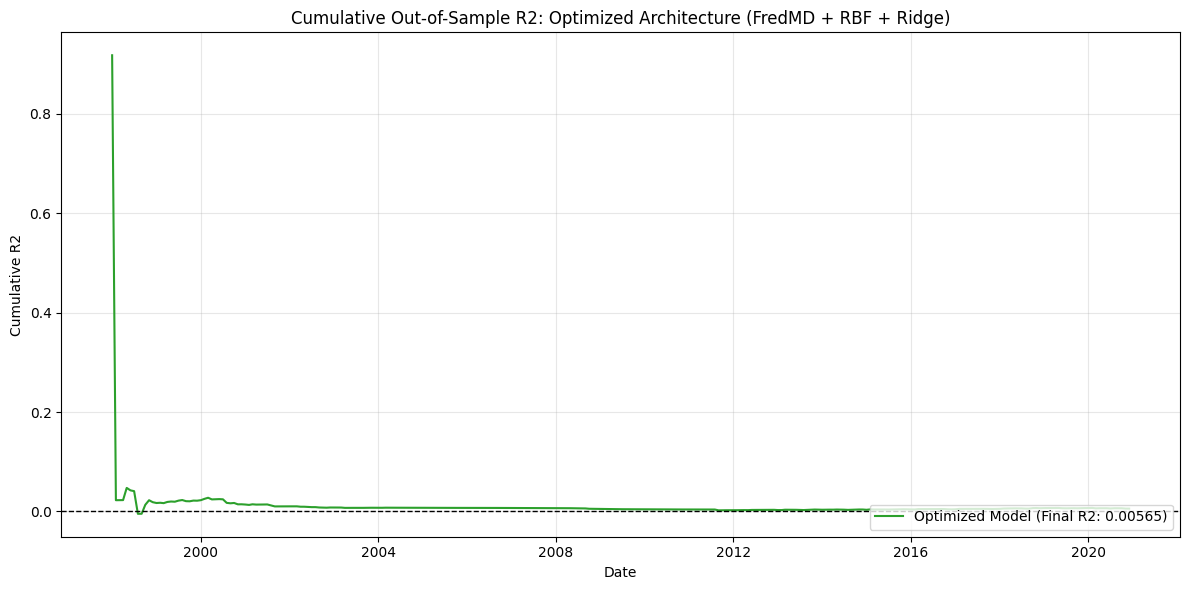

In [19]:
### PLOT CUMULATIVE OOS R2 VALUE ###

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert lists to arrays for calculation
actuals_arr = np.array(actuals)
preds_arr = np.array(preds)
baseline_errors_arr = np.array(baseline_errors)

# Calculate Cumulative Squared Errors
cum_sse_model = np.cumsum((actuals_arr - preds_arr)**2)
cum_sse_baseline = np.cumsum(baseline_errors_arr**2)

# Calculate Cumulative R2
# Handle potential division by zero at the start safely
with np.errstate(divide='ignore', invalid='ignore'):
    cum_r2 = 1 - (cum_sse_model / cum_sse_baseline)

# Plotting
plt.figure(figsize=(12, 6))
plot_dates = pd.to_datetime(dates, format='%Y%m')

plt.plot(plot_dates, cum_r2, color='#2ca02c', label=f'Optimized Model (Final R2: {cum_r2[-1]:.5f})')
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Cumulative Out-of-Sample R2: Optimized Architecture (FredMD + RBF + Ridge)')
plt.xlabel('Date')
plt.ylabel('Cumulative R2')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Response**:

Looking to previous analyses, we wanted to develop a model that combined a number of the better performing methods to find the signal through the noise. To do this, we did the following:
- **Combined `gw` and `fredmd` datasets**: This provided us the ability to benefit from a higher number of potential parameters for the model to consider.
- **Used `RBFSampler` with 2000 components**: This allowed us to project features into a higher-dimension space, allowing us to better capture non-linearities without expanding to a size that is difficult to run in Colab.
- **Employed Ridge Regression for prediction**: Used Ridge to maintain all of the potential outputs (i.e., moving none to `0.0`), but minimizing those with less value.
- **Used `TimeSeriesSplit` to tune hyperparameters**: Tuning these parameters with this specific one allows us to avoid potential look-ahead bias in testing data.

Together, these allowed us to develop a model with `R2 = 0.00565`, outperforming prior linear models and other modeling techniques, including those positive ones found in Question 1(c).